In [1]:
import numpy as np
import findiff as fd
import matplotlib.pyplot as plt
import random
from skimage import measure
from skimage import filters
from bridson import poisson_disc_samples

In [2]:
Width  = 2000
Height = 2000
Xpmin = -10.0; Xpmax = 10.0
Ypmin = -10.0; Ypmax = 10.0
rmin =  0.5; rmax  =  1.5
Gmin =  1.0; Gmax  = 20.0

samples = poisson_disc_samples(width=1, height=1, r=1.2*rmax/(Xpmax-Xpmin))

Xp = []
Yp = []
for point in samples:
    Xp.append(point[0])
    Yp.append(point[1])
Xp = np.array(Xp)
Yp = np.array(Yp)

Xp = (Xpmax-Xpmin-2)*Xp + (Xpmin+1)
Yp = (Ypmax-Ypmin-2)*Yp + (Ypmin+1)

keys = np.random.choice(range(Xp.shape[0]),size = 20, replace=False)
Xp = Xp[keys]
Yp = Yp[keys]

sign = np.random.choice([-1,1],Xp.shape[0])
G    = np.random.uniform(Gmin,Gmax,size=Xp.shape[0])
rc   = np.random.uniform(rmin,rmax,size=Xp.shape[0])

pvar = np.vstack((Xp,Yp,sign,G,rc)).T

In [3]:
pvar

array([[-3.80344977, -8.5974084 ,  1.        , 11.9921373 ,  1.36492634],
       [-3.34048473,  4.47901315,  1.        , 14.33513995,  0.96325274],
       [ 4.32928556, -4.67834959, -1.        , 11.82125772,  0.96943205],
       [-8.71445536, -5.62121764, -1.        , 16.00409206,  1.02780377],
       [-4.67707618,  2.71475696, -1.        ,  4.66858084,  1.46704531],
       [ 6.06970744, -4.2118261 , -1.        , 19.29212057,  0.72799018],
       [ 4.5929727 , -2.80824142,  1.        , 15.96765563,  1.03222224],
       [-7.06696705,  2.05933298,  1.        , 11.43979343,  1.02873455],
       [-3.89816915, -0.57944207, -1.        ,  4.70671349,  0.52421739],
       [ 5.53935665,  7.97299685,  1.        , 14.72256662,  1.30490956],
       [-5.66349355, -6.83644313,  1.        , 19.79410458,  1.40732382],
       [-1.930518  , -1.74396732,  1.        ,  8.4375933 ,  0.56783132],
       [ 2.61911018, -2.35491174, -1.        , 18.98613428,  1.41794457],
       [ 4.81373517, -7.76224494, -1. 

In [4]:
Width  = 2000
Height = 2000
Xmin = -10.0; Xmax = 10.0
Ymin = -10.0; Ymax = 10.0

X = np.linspace(Xmin,Xmax,Width)
Y = np.linspace(Ymin,Ymax,Height)

dx = X[1]-X[0]
dy = Y[1]-Y[0]

d_dx = fd.FinDiff(0,dx,1,acc = 2)
d_dy = fd.FinDiff(1,dy,1,acc = 2)

Xv,Yv = np.meshgrid(X,Y,indexing="ij")

In [5]:
u = np.zeros(Xv.shape)
v = np.zeros(Xv.shape)

for point in pvar:
    x0 = point[0]
    y0 = point[1]
    Gamma = point[2]*point[3]
    rc = point[4]
    
    rc2 = rc*rc
    
    r2 = (Xv-x0)**2 + (Yv-y0)**2
    Fr  = (Gamma/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
    u  += - (Yv-y0) * Fr
    v  +=   (Xv-x0) * Fr

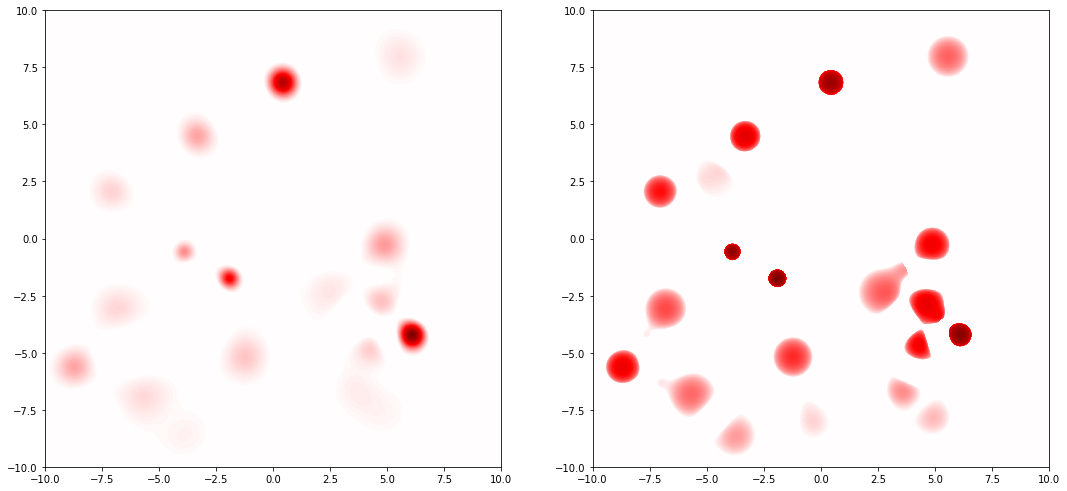

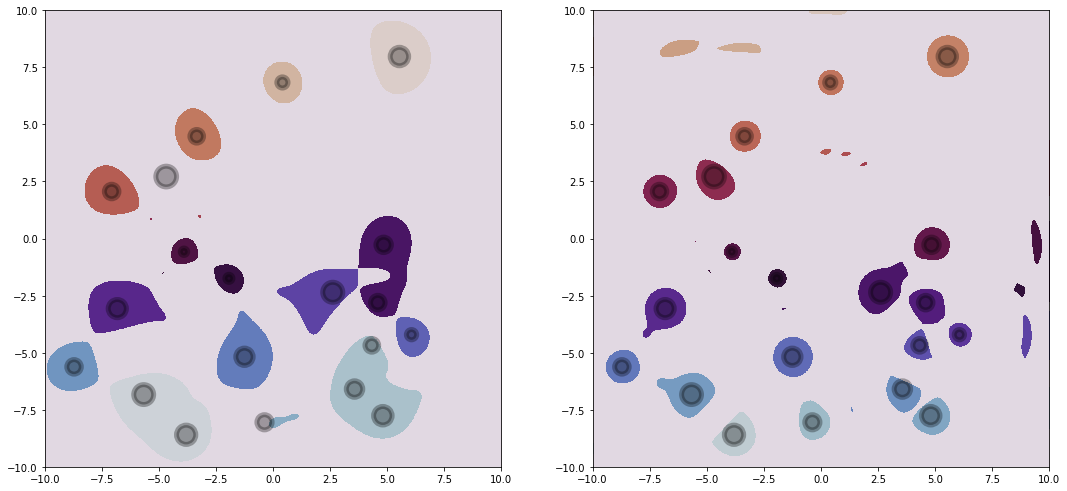

In [6]:
ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

detDu = ux*vy - uy*vx
lamb  = detDu 

##############################################

ux = d_dx(u); uy = d_dy(u)
vx = d_dx(v); vy = d_dy(v)

uxxx = d_dx(d_dx(d_dx(u)))
uxxy = d_dx(d_dx(d_dy(u)))
uxyy = d_dx(d_dy(d_dy(u)))
uyyy = d_dy(d_dy(d_dy(u)))

vxxx = d_dx(d_dx(d_dx(v)))
vxxy = d_dx(d_dx(d_dy(v)))
vxyy = d_dx(d_dy(d_dy(v)))
vyyy = d_dy(d_dy(d_dy(v)))

omega = vx-uy
omega_tilde = uxxy + uyyy - vxxx - vxyy
lamb_tilde  = (uyyy-vxyy)*(uxxy - vxxx) - (uxyy-vxxy)**2

##############################################

lamb[lamb<0.0] = 0.0

heave = np.zeros(omega_tilde.shape)
heave[omega*omega_tilde > 0.0] = 1.0

lamb_tilde[lamb_tilde<0.0] = 0.0
lamb_tilde = lamb_tilde * heave

log_lamb_tilde = np.log(1+lamb_tilde)

##############################################

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

cbar = axes[0].imshow(lamb.T,extent=(Xmin,Xmax,Ymin,Ymax),
                      origin='lower', cmap='seismic',aspect='equal',
                      vmin = -np.max(lamb),vmax = np.max(lamb))
#plt.colorbar(cbar,fraction=0.045, pad=0.04)

cbar = axes[1].imshow(log_lamb_tilde.T,extent=(Xmin,Xmax,Ymin,Ymax),
                      origin='lower', cmap='seismic',aspect='equal',
                      vmin = -np.max(log_lamb_tilde),vmax = np.max(log_lamb_tilde))
#plt.colorbar(cbar,fraction=0.045, pad=0.04)

#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.show()

###############################################

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

blobs = measure.label(lamb.T>0.0,background=0)
cbar = axes[0].imshow(blobs,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower',cmap='twilight')
#fig.colorbar(cbar,fraction=0.045, pad=0.04)
axes[0].scatter(Xp,Yp,s=200*(pvar[:,4]**2),marker='o',linewidths = 5,alpha=0.3,color='k')

blobs = measure.label(lamb_tilde.T>0.0,background=0)
cbar = axes[1].imshow(blobs,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower',cmap='twilight')
#fig.colorbar(cbar,fraction=0.045, pad=0.04)
axes[1].scatter(Xp,Yp,s=200*(pvar[:,4]**2),marker='o',linewidths = 5,alpha=0.3,color='k')

plt.show()

In [7]:
def generate_sample(Nsamples,Xpmin=-9.0,Xpmax=9.0,Ypmin=-9.0,Ypmax=9.0,
                             rmin=0.5,rmax=1.5,Gmin=1.0,Gmax=20.0):
    
    samples = poisson_disc_samples(width=1, height=1, r=1.2*np.sqrt(rmin*rmax)/(Xpmax-Xpmin))
    
    Xp = []
    Yp = []
    for point in samples:
        Xp.append(point[0])
        Yp.append(point[1])
    Xp = np.array(Xp)
    Yp = np.array(Yp)
    
    Xp = (Xpmax-Xpmin)*Xp + Xpmin
    Yp = (Ypmax-Ypmin)*Yp + Ypmin
    
    keys = np.random.choice(range(Xp.shape[0]),size = Nsamples, replace=False)
    Xp = Xp[keys]
    Yp = Yp[keys]
    
    sign = np.random.choice([-1,1],Xp.shape[0])
    G    = np.random.uniform(Gmin,Gmax,size=Xp.shape[0])
    rc   = np.random.uniform(rmin,rmax,size=Xp.shape[0])
    
    pvar = np.vstack((Xp,Yp,sign,G,rc)).T
    
    return pvar

In [8]:
pvar = generate_sample(20)

In [9]:
pvar

array([[-1.82081931,  8.37432434,  1.        ,  8.27981607,  1.15416993],
       [ 2.50871966, -0.04678011, -1.        , 19.63937423,  0.70508818],
       [-5.81164292,  8.07229275,  1.        , 19.52474759,  0.7194182 ],
       [-8.22491802, -1.82347735, -1.        ,  8.33587053,  0.75968033],
       [-5.95796977, -6.64844834,  1.        ,  5.15854619,  1.445856  ],
       [ 1.55424249,  2.14686656,  1.        ,  1.95989524,  1.06115278],
       [ 2.02150207, -2.70654771, -1.        , 12.30884731,  0.62722419],
       [ 4.841172  , -5.98451513, -1.        , 12.32936502,  0.83648443],
       [ 3.74271818,  5.1580348 ,  1.        , 19.37129979,  0.76936623],
       [ 5.71950198,  8.30189498, -1.        , 11.82813593,  0.61877367],
       [-2.38487306, -4.9037911 , -1.        , 15.02086232,  1.25752433],
       [ 7.38569638, -3.58974456, -1.        , 18.26968113,  1.20483672],
       [-7.89703314,  2.74805864,  1.        , 12.87516708,  1.42145767],
       [-1.79799811, -1.05095006, -1. 

In [10]:
def compute_field(pvar,Width = 2000,Height=2000,
                       Xmin  = -10.,Xmax  = 10.,
                       Ymin  = -10.,Ymax  = 10.,
                       obar =  0.00):
    
    X = np.linspace(Xmin,Xmax,Width)
    Y = np.linspace(Ymin,Ymax,Height)
    
    Xv,Yv = np.meshgrid(X,Y,indexing="ij")
    
    u = np.zeros(Xv.shape)
    v = np.zeros(Xv.shape)
    
    for point in pvar:
        x0 = point[0]
        y0 = point[1]
        Gamma = point[2]*point[3]
        rc = point[4]
        
        rc2 = rc*rc
        
        r2 = (Xv-x0)**2 + (Yv-y0)**2
        Fr  = (Gamma/(2*np.pi*r2))*(1-np.exp(-r2/rc2))
        u  += - (Yv-y0) * Fr
        v  +=   (Xv-x0) * Fr
        
    u   +=  0.5*obar*Yv
        
    return Xv,Yv,u,v

In [11]:
Xv,Yv,u,v = compute_field(pvar)

Xmin = Xv[ 0,0]
Xmax = Xv[-1,0]

Ymin = Yv[0, 0]
Ymax = Yv[0,-1]

dx = Xv[1,0]-Xv[0,0]
dy = Yv[0,1]-Yv[0,0]
d_dx = fd.FinDiff(0,dx,1,acc = 2)
d_dy = fd.FinDiff(1,dy,1,acc = 2)

In [12]:
def compute_swirling_strength(u,v,d_dx,d_dy):
    ux = d_dx(u); uy = d_dy(u)
    vx = d_dx(v); vy = d_dy(v)
    
    detDu = ux*vy - uy*vx
    lamb  = detDu 
    
    return lamb

def compute_vorticity_curvature(u,v,d_dx,d_dy):
    ux = d_dx(u); uy = d_dy(u)
    vx = d_dx(v); vy = d_dy(v)
    
    uxxx = d_dx(d_dx(d_dx(u)))
    uxxy = d_dx(d_dx(d_dy(u)))
    uxyy = d_dx(d_dy(d_dy(u)))
    uyyy = d_dy(d_dy(d_dy(u)))
    
    vxxx = d_dx(d_dx(d_dx(v)))
    vxxy = d_dx(d_dx(d_dy(v)))
    vxyy = d_dx(d_dy(d_dy(v)))
    vyyy = d_dy(d_dy(d_dy(v)))
    
    omega = vx-uy
    omega_tilde = uxxy + uyyy - vxxx - vxyy
    lamb_tilde  = (uyyy-vxyy)*(uxxy - vxxx) - (uxyy-vxxy)**2
    
    return omega, omega_tilde, lamb_tilde

In [13]:
lamb = compute_swirling_strength(u,v,d_dx,d_dy)
omega, omega_tilde, lamb_tilde = compute_vorticity_curvature(u,v,d_dx,d_dy)

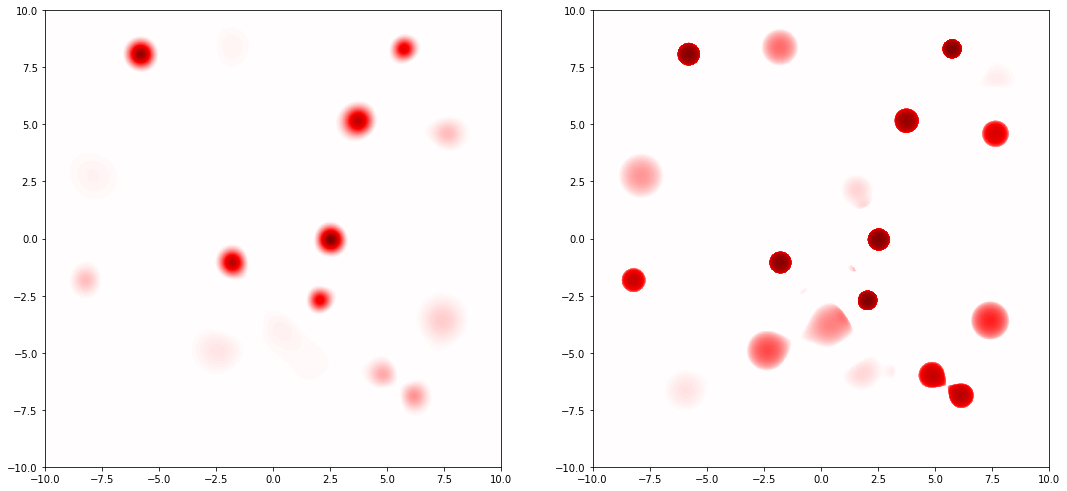

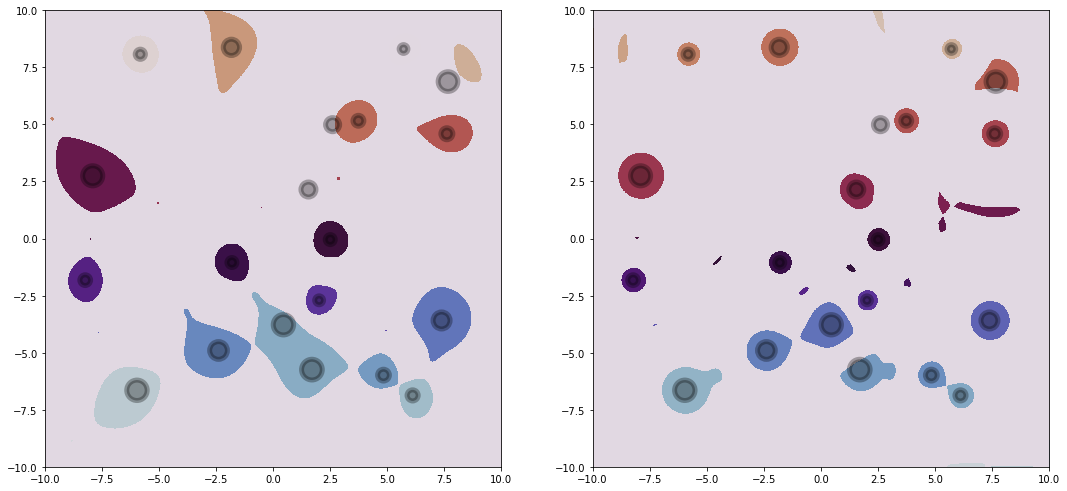

In [14]:
lamb[lamb<0.0] = 0.0

heave = np.zeros(omega_tilde.shape)
heave[omega*omega_tilde > 0.0] = 1.0

lamb_tilde[lamb_tilde<0.0] = 0.0
lamb_tilde = lamb_tilde * heave

log_lamb_tilde = np.log(1+lamb_tilde)

##############################################

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

cbar = axes[0].imshow(lamb.T,extent=(Xmin,Xmax,Ymin,Ymax),
                      origin='lower', cmap='seismic',aspect='equal',
                      vmin = -np.max(lamb),vmax = np.max(lamb))
#plt.colorbar(cbar,fraction=0.045, pad=0.04)

cbar = axes[1].imshow(log_lamb_tilde.T,extent=(Xmin,Xmax,Ymin,Ymax),
                      origin='lower', cmap='seismic',aspect='equal',
                      vmin = -np.max(log_lamb_tilde),vmax = np.max(log_lamb_tilde))
#plt.colorbar(cbar,fraction=0.045, pad=0.04)

#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.show()

###############################################

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

blobs = measure.label(lamb.T>0.0,background=0)
cbar = axes[0].imshow(blobs,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower',cmap='twilight')
#fig.colorbar(cbar,fraction=0.045, pad=0.04)
axes[0].scatter(pvar[:,0],pvar[:,1],s=200*(pvar[:,4]**2),marker='o',linewidths = 5,alpha=0.3,color='k')

blobs = measure.label(lamb_tilde.T>0.0,background=0)
cbar = axes[1].imshow(blobs,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower',cmap='twilight')
#fig.colorbar(cbar,fraction=0.045, pad=0.04)
axes[1].scatter(pvar[:,0],pvar[:,1],s=200*(pvar[:,4]**2),marker='o',linewidths = 5,alpha=0.3,color='k')

plt.show()

In [15]:
Xv,Yv,u,v = compute_field(pvar,obar = 1)

Xmin = Xv[ 0,0]
Xmax = Xv[-1,0]

Ymin = Yv[0, 0]
Ymax = Yv[0,-1]

dx = Xv[1,0]-Xv[0,0]
dy = Yv[0,1]-Yv[0,0]
d_dx = fd.FinDiff(0,dx,1,acc = 2)
d_dy = fd.FinDiff(1,dy,1,acc = 2)

lamb = compute_swirling_strength(u,v,d_dx,d_dy)
omega, omega_tilde, lamb_tilde = compute_vorticity_curvature(u,v,d_dx,d_dy)

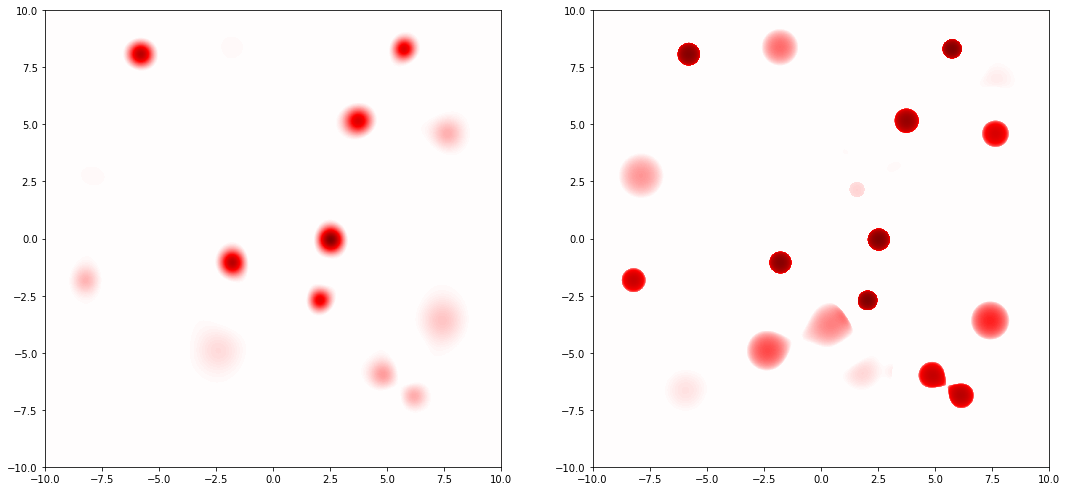

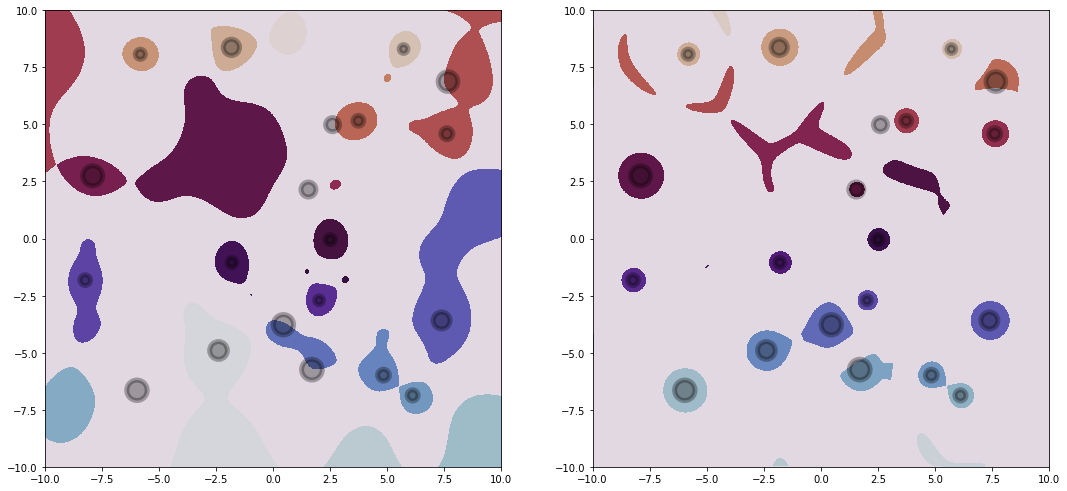

In [16]:
lamb[lamb<0.0] = 0.0

heave = np.zeros(omega_tilde.shape)
heave[omega*omega_tilde > 0.0] = 1.0

lamb_tilde[lamb_tilde<0.0] = 0.0
lamb_tilde = lamb_tilde * heave

log_lamb_tilde = np.log(1+lamb_tilde)

##############################################

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

cbar = axes[0].imshow(lamb.T,extent=(Xmin,Xmax,Ymin,Ymax),
                      origin='lower', cmap='seismic',aspect='equal',
                      vmin = -np.max(lamb),vmax = np.max(lamb))
#plt.colorbar(cbar,fraction=0.045, pad=0.04)

cbar = axes[1].imshow(log_lamb_tilde.T,extent=(Xmin,Xmax,Ymin,Ymax),
                      origin='lower', cmap='seismic',aspect='equal',
                      vmin = -np.max(log_lamb_tilde),vmax = np.max(log_lamb_tilde))
#plt.colorbar(cbar,fraction=0.045, pad=0.04)

#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.show()

###############################################

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18,18*((Ymax-Ymin)/(Xmax-Xmin))))

blobs = measure.label(lamb.T>0.0,background=0)
cbar = axes[0].imshow(blobs,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower',cmap='twilight')
#fig.colorbar(cbar,fraction=0.045, pad=0.04)
axes[0].scatter(pvar[:,0],pvar[:,1],s=200*(pvar[:,4]**2),marker='o',linewidths = 5,alpha=0.3,color='k')

blobs = measure.label(lamb_tilde.T>0.0,background=0)
cbar = axes[1].imshow(blobs,extent=(Xmin,Xmax,Ymin,Ymax),origin='lower',cmap='twilight')
#fig.colorbar(cbar,fraction=0.045, pad=0.04)
axes[1].scatter(pvar[:,0],pvar[:,1],s=200*(pvar[:,4]**2),marker='o',linewidths = 5,alpha=0.3,color='k')

plt.show()